In [1]:
from numpy import *
import matplotlib.pyplot as plt

In [2]:
# y = mx + b
# m is slope, b is y-intercept

def compute_error_for_line_given_points(b, m, points):
    total_error = 0
    
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        total_error += (y - (m * x + b)) ** 2
        
    return total_error / float(len(points))

In [3]:
def step_gradient(b_current, m_current, points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        
        # By power rule
        b_gradient += -2 * (y - ((m_current * x) + b_current))
        m_gradient += -2 * x * (y - ((m_current * x) + b_current))
        
    new_b = b_current - (learning_rate * b_gradient / N)
    new_m = m_current - (learning_rate * m_gradient / N)
    
    return [new_b, new_m]

In [4]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        
    return [b, m]

In [5]:
def run(lr, init_b, init_m, num_iter):
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = lr
    num_iterations = num_iter
    error = compute_error_for_line_given_points(init_b, init_m, points)

    print("Starting gradient descent,")
    print("y = {0} * x + {1}, error = {2}".format(init_m, init_b, compute_error_for_line_given_points(init_b, init_m, points)))
    print("\nRunning...\n")
    
    [b, m] = gradient_descent_runner(points, init_b, init_m, learning_rate, num_iterations)
    
    print("After {0} iterations,".format(num_iterations))
    print("y = {0} * x + {1}, error = {2}".format(m, b, compute_error_for_line_given_points(b, m, points)))
    
    line = m * points[:, 0] + b
    plt.plot(points[:, 0], points[:, 1], 'o', points[:, 0], line)
    plt.show()

Starting gradient descent,
y = 0 * x + 0, error = 5565.107834483211

Running...

After 10000 iterations,
y = 1.4675440436333027 * x + 0.6078985997054932, error = 112.31533427075733


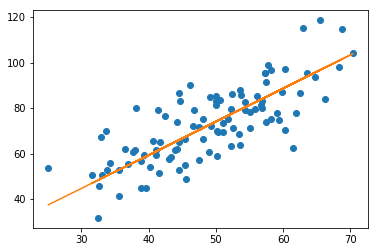

In [6]:
run(0.0001, 0, 0, 10000)